<a href="https://colab.research.google.com/github/Kamiilykam/pandas-challenge/blob/master/Preassesment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ecoli.csv.csv to ecoli.csv.csv


In [5]:
df = pd.read_csv('ecoli.csv.csv')

In [6]:
df.drop('SEQUENCE_NAME', axis=1, inplace=True)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

site_mapping = {
    'cp': 0, 'im': 1, 'imS': 2, 'imL': 3, 'imU': 4,
    'om': 5, 'omL': 6, 'pp': 7
}
df['SITE'] = df['SITE'].map(site_mapping)

X = df.drop('SITE', axis=1)
y = df['SITE']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_train_pred = lr.predict(X_train)
lr_y_test_pred = lr.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_y_train_pred = svm.predict(X_train_scaled)
svm_y_test_pred = svm.predict(X_test_scaled)

# Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
br_y_train_pred = br.predict(X_train)
br_y_test_pred = br.predict(X_test)

# Light Gradient Boosting Machine Regression
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_y_train_pred = lgbm.predict(X_train)
lgbm_y_test_pred = lgbm.predict(X_test)



In [7]:
# Evaluate the models
def evaluate_model(y_train_true, y_train_pred, y_test_true, y_test_pred, model_name):
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')
    print(f'{model_name} Train Accuracy: {train_accuracy:.4f}')
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} Train F1 Score: {train_f1:.4f}')
    print(f'{model_name} Test F1 Score: {test_f1:.4f}')
    print('')

# Print the evaluation results
evaluate_model(y_train, lr_y_train_pred, y_test, lr_y_test_pred, 'Logistic Regression')
evaluate_model(y_train, svm_y_train_pred, y_test, svm_y_test_pred, 'Support Vector Machine')
evaluate_model(y_train, br_y_train_pred.round(), y_test, br_y_test_pred.round(), 'Bayesian Ridge Regression')
evaluate_model(y_train, lgbm_y_train_pred.round(), y_test, lgbm_y_test_pred.round(), 'LightGBM')



Logistic Regression Train Accuracy: 0.8172
Logistic Regression Test Accuracy: 0.7794
Logistic Regression Train F1 Score: 0.7858
Logistic Regression Test F1 Score: 0.7310

Support Vector Machine Train Accuracy: 0.8993
Support Vector Machine Test Accuracy: 0.8676
Support Vector Machine Train F1 Score: 0.8975
Support Vector Machine Test F1 Score: 0.8600

Bayesian Ridge Regression Train Accuracy: 0.2500
Bayesian Ridge Regression Test Accuracy: 0.2941
Bayesian Ridge Regression Train F1 Score: 0.3058
Bayesian Ridge Regression Test F1 Score: 0.3489

LightGBM Train Accuracy: 0.6828
LightGBM Test Accuracy: 0.5294
LightGBM Train F1 Score: 0.7547
LightGBM Test F1 Score: 0.6034



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_train_pred = lr.predict(X_train)
lr_y_test_pred = lr.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_y_train_pred = svm.predict(X_train_scaled)
svm_y_test_pred = svm.predict(X_test_scaled)

# Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
br_y_train_pred = br.predict(X_train)
br_y_test_pred = br.predict(X_test)

# Light Gradient Boosting Machine Regression
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_y_train_pred = lgbm.predict(X_train)
lgbm_y_test_pred = lgbm.predict(X_test)

# Evaluate the models
def evaluate_model(y_train_true, y_train_pred, y_test_true, y_test_pred, model_name):
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')
    print(f'{model_name} Train Accuracy: {train_accuracy:.4f}')
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} Train F1 Score: {train_f1:.4f}')
    print(f'{model_name} Test F1 Score: {test_f1:.4f}')
    print('')

# Print the evaluation results
evaluate_model(y_train, lr_y_train_pred, y_test, lr_y_test_pred, 'Logistic Regression')
evaluate_model(y_train, svm_y_train_pred, y_test, svm_y_test_pred, 'Support Vector Machine')
evaluate_model(y_train, br_y_train_pred.round(), y_test, br_y_test_pred.round(), 'Bayesian Ridge Regression')
evaluate_model(y_train, lgbm_y_train_pred.round(), y_test, lgbm_y_test_pred.round(), 'LightGBM')




Logistic Regression Train Accuracy: 0.8172
Logistic Regression Test Accuracy: 0.7794
Logistic Regression Train F1 Score: 0.7858
Logistic Regression Test F1 Score: 0.7310

Support Vector Machine Train Accuracy: 0.8993
Support Vector Machine Test Accuracy: 0.8676
Support Vector Machine Train F1 Score: 0.8975
Support Vector Machine Test F1 Score: 0.8600

Bayesian Ridge Regression Train Accuracy: 0.2500
Bayesian Ridge Regression Test Accuracy: 0.2941
Bayesian Ridge Regression Train F1 Score: 0.3058
Bayesian Ridge Regression Test F1 Score: 0.3489

LightGBM Train Accuracy: 0.6828
LightGBM Test Accuracy: 0.5294
LightGBM Train F1 Score: 0.7547
LightGBM Test F1 Score: 0.6034



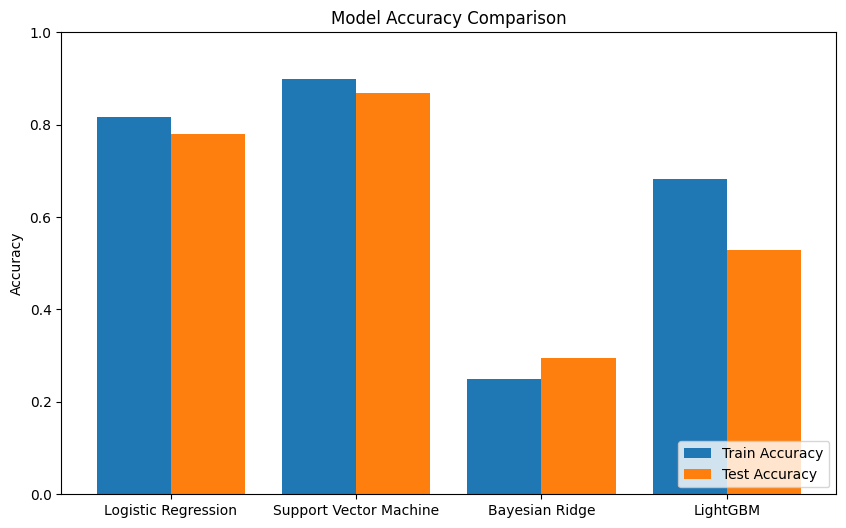

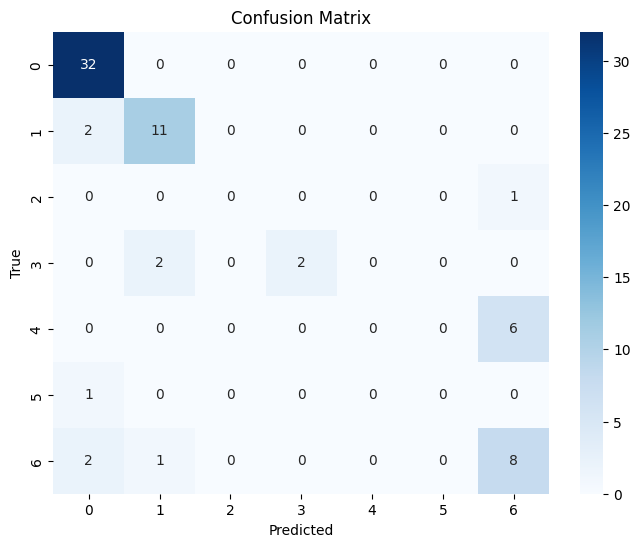

In [14]:
# Plotting the results
def plot_accuracy(model_names, train_acc, test_acc):
    plt.figure(figsize=(10, 6))
    x = range(len(model_names))
    plt.bar(x, train_acc, width=0.4, label='Train Accuracy')
    plt.bar([i + 0.4 for i in x], test_acc, width=0.4, label='Test Accuracy')
    plt.xticks([i + 0.2 for i in x], model_names)
    plt.ylim([0, 1.0])
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot accuracy comparison
model_names = ['Logistic Regression', 'Support Vector Machine', 'Bayesian Ridge', 'LightGBM']
train_accuracies = [accuracy_score(y_train, lr_y_train_pred), accuracy_score(y_train, svm_y_train_pred),
                    accuracy_score(y_train, br_y_train_pred.round()), accuracy_score(y_train, lgbm_y_train_pred.round())]
test_accuracies = [accuracy_score(y_test, lr_y_test_pred), accuracy_score(y_test, svm_y_test_pred),
                   accuracy_score(y_test, br_y_test_pred.round()), accuracy_score(y_test, lgbm_y_test_pred.round())]
plot_accuracy(model_names, train_accuracies, test_accuracies)

# Plot confusion matrix for logistic regression
plot_confusion_matrix(y_test, lr_y_test_pred)